# White Wine Quality EDA

## 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## 2. Import CSV Data "winequality-white.csv"

In [2]:
data = pd.read_csv("winequality-white.csv", sep = ";")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
data["bound sulfur dioxide"] = data["total sulfur dioxide"] - data["free sulfur dioxide"]

In [5]:
data = data.drop("total sulfur dioxide", 1)

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,68.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,111.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,81.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,90.0


## 3. Info Data (Type and Null Values) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   density               4898 non-null   float64
 7   pH                    4898 non-null   float64
 8   sulphates             4898 non-null   float64
 9   alcohol               4898 non-null   float64
 10  quality               4898 non-null   int64  
 11  bound sulfur dioxide  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## 4. Data or Features Descriptions

Features Description

- Fixed Acidity : Amount of Tartaric Acid in wine, measured in g/dm3
- Volatile Acidity : Amount of Acetic Acid in wine, measured in g/dm3
- Citric Acid : Amount of citric acid in wine in g/dm3. Contributes to crispness of wine.
- Residual Sugar : amonunt of sugar left in wine after fermentation. Measured in in g/dm3
- Chlorides : amount of Sodium Choloride (salt) in wine. Measured in g/dm3
- Free Sulfur Dioxide : Amount of SO2 in free form. Measured in mg/dm3
- Total Sulfur Dioxide : Total Amount of SO2. Too much SO2 can lead to a pungent smell. SO2 acts as antioxidant and antimicrobial agent.
- Density : Density of Wine in g/dm3
- pH : pH of Wine on a scale of 0-14 . 0 means highly Acidic, while 14 means highly basic.
- Sulphates : Amount of Potassium Sulphate in wine, measured in g/dm3.Contributes to the formation of SO2.
- Alcohol : alcohol content in wine (in terms of % volume)
- Quality : Wine Quality graded on a scale of 1 - 10 (Higher is better

## 5. Change Columns Names (replace " " to "_")

In [8]:
# remove space from all features
data.columns = [col.strip().replace(' ', '_') for col in data.columns]
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'bound_sulfur_dioxide'],
      dtype='object')

## 6. Describe Data

In [9]:
data_desc = data.describe()


In [10]:
data_desc

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,0.994027,3.188267,0.489847,10.514267,5.877909,103.052572
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,0.002991,0.151001,0.114126,1.230621,0.885639,34.721700
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,0.987110,2.720000,0.220000,8.000000,3.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,0.991723,3.090000,0.410000,9.500000,5.000000,78.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,0.993740,3.180000,0.470000,10.400000,6.000000,100.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,0.996100,3.280000,0.550000,11.400000,6.000000,125.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,1.038980,3.820000,1.080000,14.200000,9.000000,331.000000


## 7. Distribution Plots

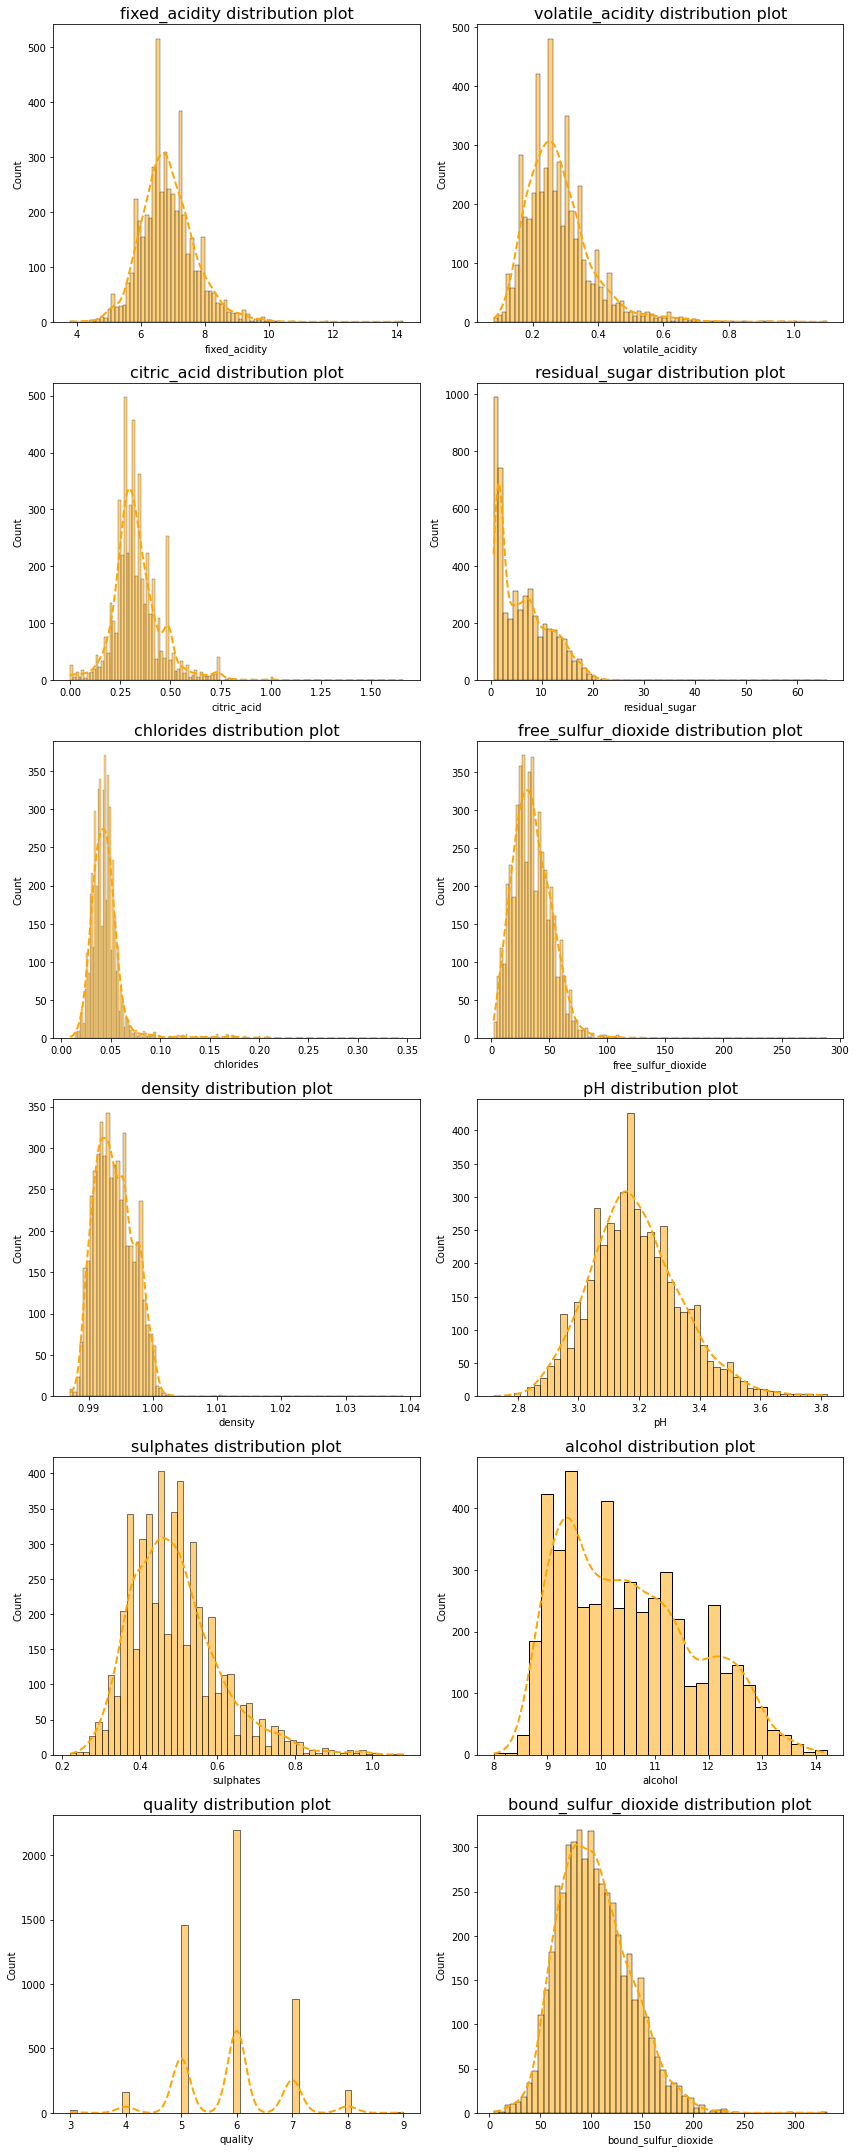

In [11]:
cols = data.columns

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(12, 30))
axs = np.ravel(axs)

for i, col in enumerate(cols):
    plt.sca(axs[i])
    sns.histplot(data=data, x=col, 
                 kde=True, fill=True, 
                 line_kws={'lw':2,'ls':'--','color':'k'}, 
                 color='orange')
    plt.title(f"{col} distribution plot", fontdict={'size':16,'color':'k'})
    
plt.tight_layout()
plt.show()

## 8. Box Plot (Checking Outliers)

In [12]:
def plot_box_swarm(data=data, x='quality', y=None):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

    # sns.boxplot(data=data, x=x, y=y, ax=axs)

    sns.swarmplot(data=data, x=x, y=y, ax=axs)
    plt.show()

# for col in data.columns.tolist()[:-1]:
#     plot_box_swarm(data=data, y=col)

## 9. Correlation each Features

In [13]:
data_cor = data.drop("quality", 1)
data_cor

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,bound_sulfur_dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,139.0
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,68.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,111.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,81.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,90.0


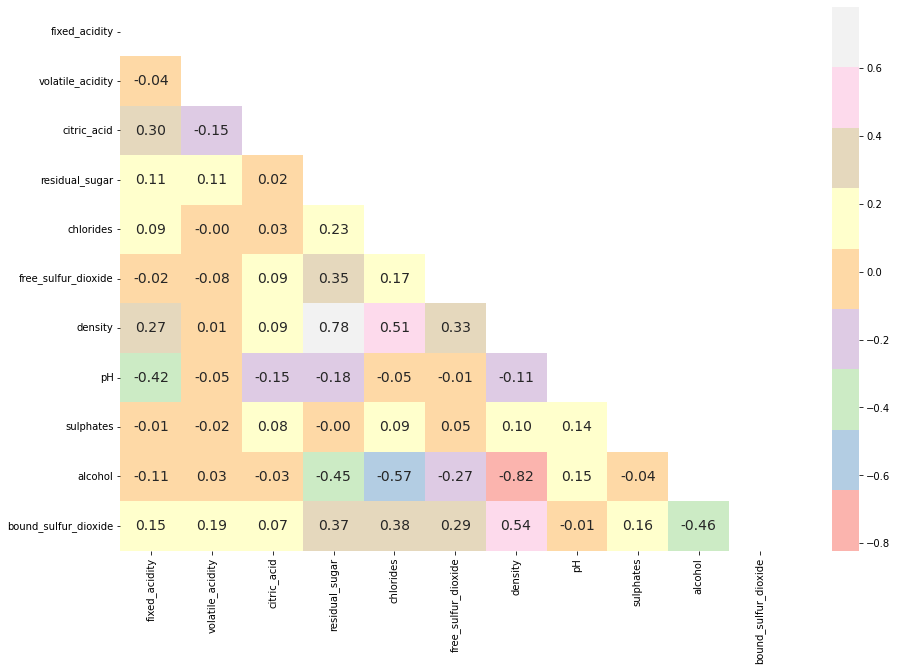

In [14]:
data_cor = data.drop("quality", 1)
corr_matrix = data_cor.corr(method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, annot_kws={'size':14}, 
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

corr_matrix['quality'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with quality")
plt.show()

## 10. Drop Outliers

In [15]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'bound_sulfur_dioxide'],
      dtype='object')

In [16]:
# cari nilai Q1 Q3
print("11. Data Quartile")
data_clean = data.copy()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

batas_bawah = Q1-(1.5*IQR)
batas_atas =  Q3+(1.5*IQR)

kolom = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'bound_sulfur_dioxide']

for i in kolom:
    data_clean[i] = data_clean[i][(data_clean[i]>=batas_bawah[i]) & (data_clean[i]<=batas_atas[i])]

print("12. Setelah nilai outlier dihilangkan :")
print(data_clean.isnull().sum())

print("13. Drop data Null, sehingga kondisi null menjadi:")
data_clean = data_clean.dropna()
print(data_clean.isnull().sum().sum())

11. Data Quartile
12. Setelah nilai outlier dihilangkan :
fixed_acidity           119
volatile_acidity        186
citric_acid             270
residual_sugar            7
chlorides               208
free_sulfur_dioxide      50
density                   5
pH                       75
sulphates               124
alcohol                   0
quality                   0
bound_sulfur_dioxide     43
dtype: int64
13. Drop data Null, sehingga kondisi null menjadi:
0


In [17]:
batas = pd.DataFrame({"Lower Limit" : batas_bawah,
                        "Upper Limit" : batas_atas,
})

batas

,Lower Limit,Upper Limit
fixed_acidity,4.800000,8.800000
volatile_acidity,0.045000,0.485000
citric_acid,0.090000,0.570000
residual_sugar,-10.600000,22.200000
chlorides,0.015000,0.071000
free_sulfur_dioxide,-11.500000,80.500000
density,0.985156,1.002666
pH,2.805000,3.565000
sulphates,0.200000,0.760000
alcohol,6.650000,14.250000


In [18]:
print(len(data_clean))
print(len(data))

3989
4898


## 11. Variables Correlation (Clean Data)

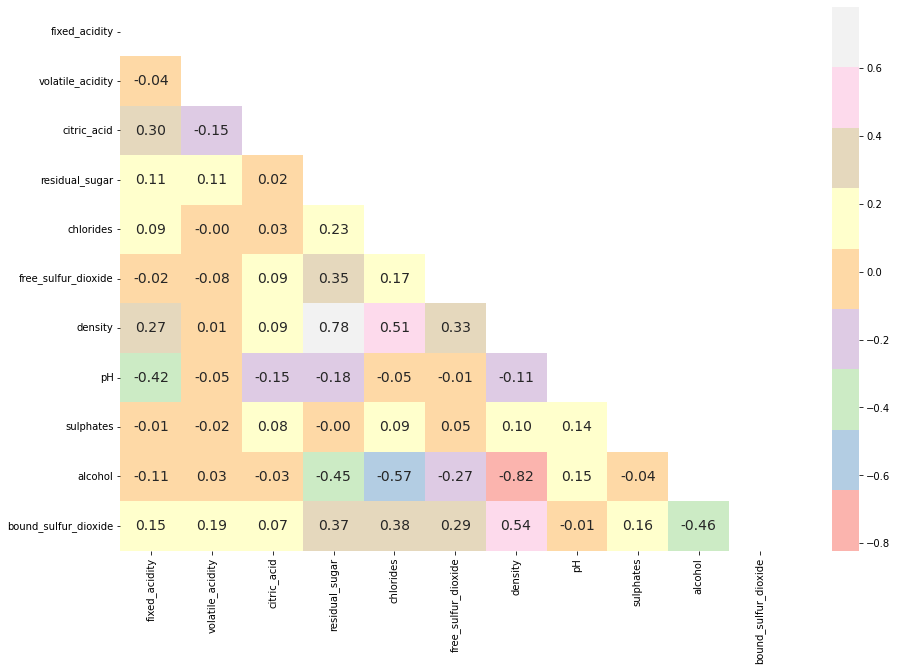

In [19]:
data_cor = data_clean
data_cor_1 = data_clean.drop("quality", 1)
corr_matrix_1 = data_cor_1.corr(method='pearson')

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, annot_kws={'size':14}, 
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

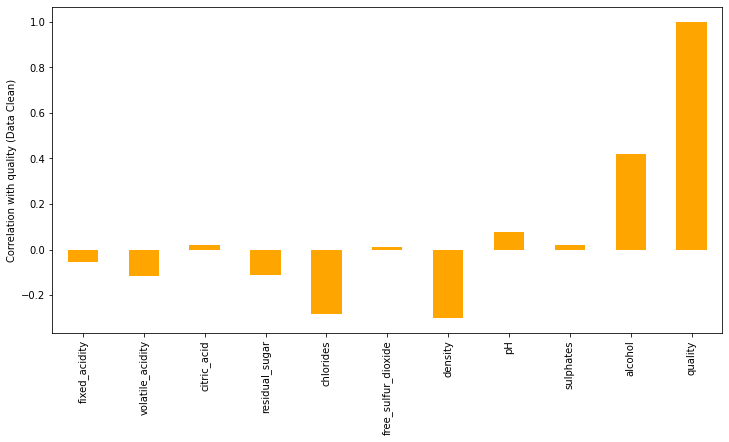

In [20]:
corr_matrix = data_cor.corr(method='pearson')
corr_matrix['quality'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with quality (Data Clean)")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


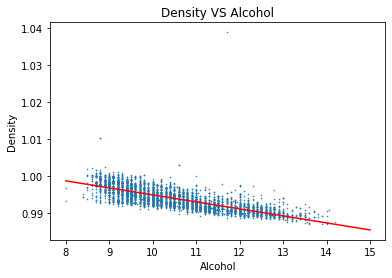

In [22]:
lin_reg.fit(data[["alcohol"]],data["density"])

y = lin_reg.predict([[8],[15]])
plt.plot([[8],[15]], y, color = 'red')


plt.scatter(data[["alcohol"]],data["density"], s = 0.3)

plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.title("Density VS Alcohol")

plt.show()

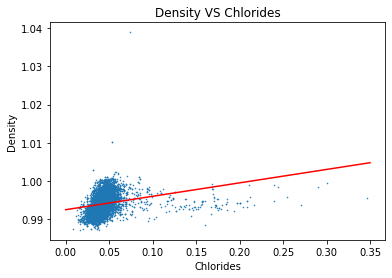

In [23]:
lin_reg.fit(data[["chlorides"]],data["density"])

y = lin_reg.predict([[0],[0.35]])
plt.plot([[0],[0.35]], y, color = 'red')


plt.scatter(data[["chlorides"]],data["density"], s = 0.3)

plt.xlabel("Chlorides")
plt.ylabel("Density")
plt.title("Density VS Chlorides")

plt.show()

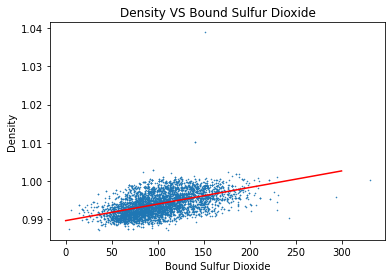

In [24]:
lin_reg.fit(data[["bound_sulfur_dioxide"]],data["density"])

y = lin_reg.predict([[0],[300]])
plt.plot([[0],[300]], y, color = 'red')


plt.scatter(data[["bound_sulfur_dioxide"]],data["density"], s = 0.3)

plt.xlabel("Bound Sulfur Dioxide")
plt.ylabel("Density")
plt.title("Density VS Bound Sulfur Dioxide")

plt.show()

## 13. Plot the correlation (3 highest correlation)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,bound_sulfur_dioxide
quality,,,,,,,,,,,
3,6.922222,0.307778,0.357778,5.705556,0.040111,17.888889,0.993290,3.246667,0.438889,11.033333,88.222222
4,7.032584,0.298258,0.314607,4.783708,0.045730,20.904494,0.993958,3.167978,0.456292,10.252247,97.455056
5,6.857976,0.282201,0.322461,7.443847,0.046127,36.139015,0.995158,3.173719,0.480082,9.863595,113.750684
6,6.798432,0.253445,0.324792,6.302812,0.042043,35.154408,0.993771,3.186923,0.480925,10.627141,100.041915
7,6.755465,0.259340,0.325477,5.270101,0.038036,33.425879,0.992449,3.204020,0.487010,11.355004,90.908920
8,6.805517,0.263724,0.328000,6.036207,0.037972,35.951724,0.992549,3.202552,0.464621,11.514483,90.593103
9,7.000000,0.305000,0.370000,2.500000,0.025500,34.750000,0.990075,3.335000,0.467500,12.625000,79.250000


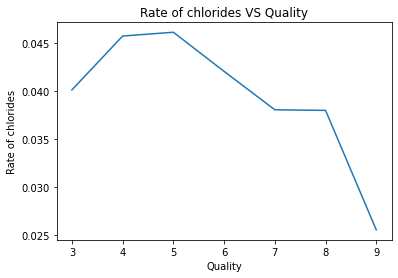

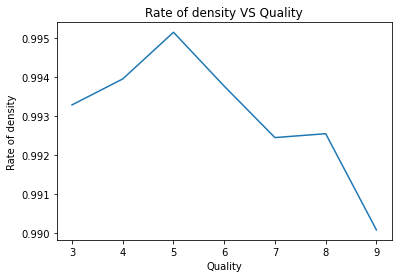

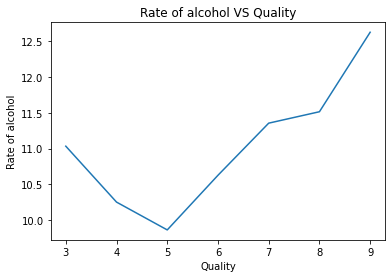

In [25]:
data_mean_feat_quality = data_clean.groupby(["quality"]).mean()
display(data_mean_feat_quality)

for i in ["chlorides", "density", "alcohol"]:
    plt.plot(data_mean_feat_quality.index, data_mean_feat_quality[i])
    plt.title(f"Rate of {i} VS Quality")
    plt.xlabel("Quality")
    plt.ylabel(f"Rate of {i}")
    plt.show()


In [26]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0


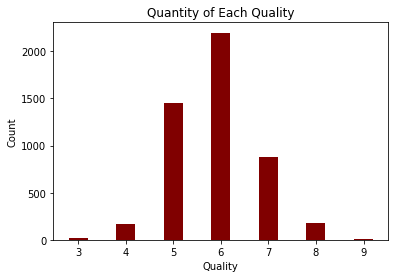

In [27]:
data_quality = pd.DataFrame(data.groupby("quality").count()["alcohol"]).rename(columns={"alcohol":"count"})

plt.bar(data_quality.index, data_quality["count"], color ='maroon',
        width = 0.4)
 
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quantity of Each Quality")
plt.show()

## 14. Separate the quality into 3 classes

In [28]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0


In [29]:
data["quality_class"] = 100
data_clean["quality_class"] = 100

In [30]:
for i,x in enumerate(data["quality"]):
    if x>6:
        data["quality_class"].iloc[i] = 2
    elif x==6:
        data["quality_class"].iloc[i] = 1
    else:
        data["quality_class"].iloc[i] = 0


data = data.drop("quality", 1)

for i,x in enumerate(data_clean["quality"]):
    if x>6:
        data_clean["quality_class"].iloc[i] = 2
    elif x==6:
        data_clean["quality_class"].iloc[i] = 1
    else:
        data_clean["quality_class"].iloc[i] = 0


data_clean = data_clean.drop("quality", 1)


In [31]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,bound_sulfur_dioxide,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,125.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,118.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,67.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,139.0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,139.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,68.0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,111.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,81.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,90.0,2


In [32]:
data_count_quality = pd.DataFrame(data.groupby("quality_class").count()["alcohol"]).rename(columns={"alcohol":"count"})
data_clean_count_quality = pd.DataFrame(data_clean.groupby("quality_class").count()["alcohol"]).rename(columns={"alcohol":"count"})

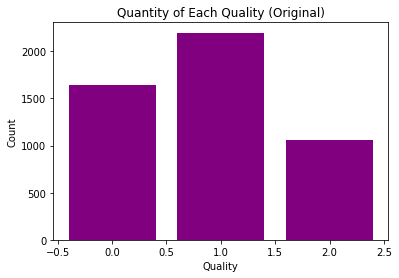

In [33]:
plt.bar(data_count_quality.index, data_count_quality["count"], color ='purple',
        width = 0.8)
 
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quantity of Each Quality (Original)")
plt.show()

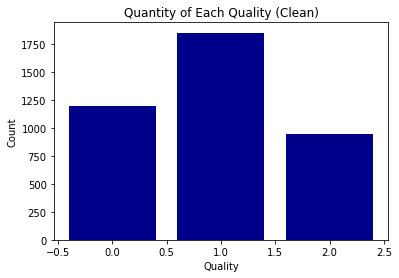

In [34]:
plt.bar(data_clean_count_quality.index, data_clean_count_quality["count"], color ='darkblue',
        width = 0.8)
 
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quantity of Each Quality (Clean)")
plt.show()

## 15. Analysis of low quality 

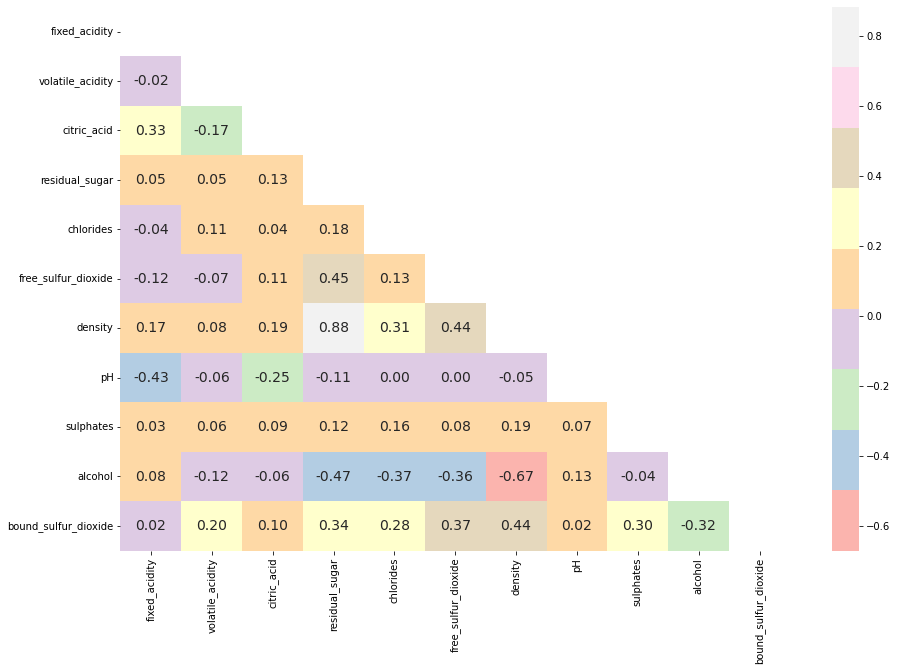

In [35]:
data_0 = data[data["quality_class"] == 0]

data_cor = data_0.drop("quality_class", 1)
corr_matrix = data_cor.corr(method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, annot_kws={'size':14}, 
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

## 16. Analysis High Quality

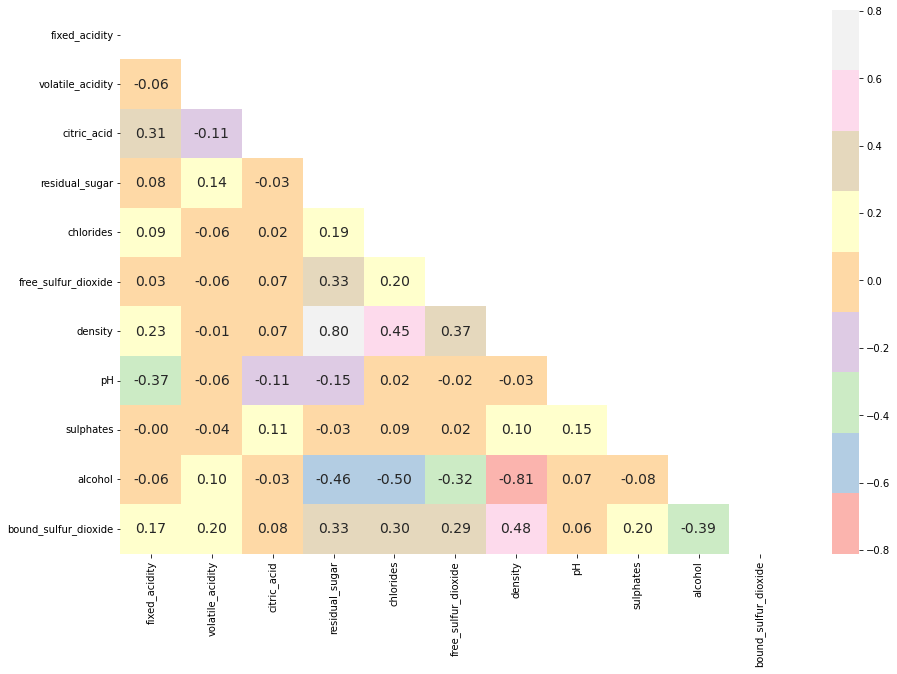

In [36]:
data_1 = data[data["quality_class"] == 1]

data_cor = data_1.drop("quality_class", 1)
corr_matrix = data_cor.corr(method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, annot_kws={'size':14}, 
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()